In [128]:
import tensorflow as tf
from tensorflow import keras

In [129]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
mnist=tf.keras.datasets.mnist
(train_x,train_y),(test_x,test_y)=mnist.load_data()

In [135]:
len(train_x)

60000

In [136]:
len(test_x)

10000

In [138]:
test_x.shape

(10000, 28, 28)

In [139]:
train_x.shape

(60000, 28, 28)

In [140]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

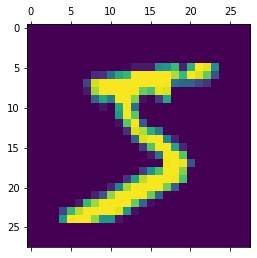

In [141]:
plt.matshow(train_x[0])

In [142]:
train_x=train_x/255
test_x=test_x/255

In [144]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [146]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [147]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [148]:
history=model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6399 - accuracy: 0.8387 - val_loss: 0.3520 - val_accuracy: 0.9035
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3343 - accuracy: 0.9062 - val_loss: 0.2862 - val_accuracy: 0.9191
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2866 - accuracy: 0.9199 - val_loss: 0.2572 - val_accuracy: 0.9266
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2569 - accuracy: 0.9272 - val_loss: 0.2347 - val_accuracy: 0.9337
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2352 - accuracy: 0.9337 - val_loss: 0.2161 - val_accuracy: 0.9385
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2171 - accuracy: 0.9392 - val_loss: 0.2028 - val_accuracy: 0.9421
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2020 - accuracy: 0.9429 - val_loss: 0.1915 - val_accuracy:

In [153]:
test_loss,test_accuracy=model.evaluate(test_x,test_y)
print("loss %.3f"%test_loss)
print("accuracy %.3f"%test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1641 - accuracy: 0.9541
loss 0.164
accuracy 0.954


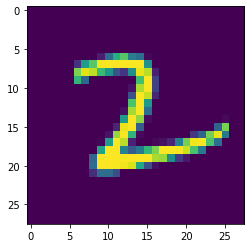

In [155]:
n=random.randint(0,999)
plt.imshow(test_x[n])
plt.show()

In [158]:
predcit_ans=model.predict(test_x)
print(np.argmax(predcit_ans[n]))

313/313 [==============================] - 1s 2ms/step
2


In [159]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

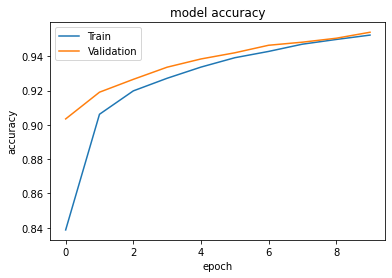

In [161]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'],loc='upper left')

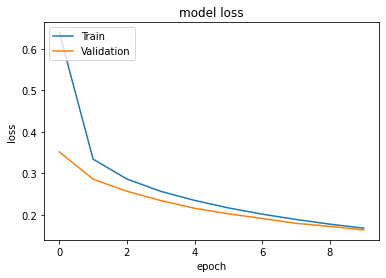

In [162]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Validation'],loc='upper left')

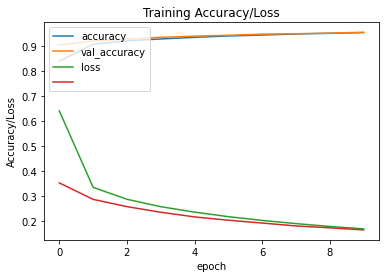

In [165]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Accuracy/Loss')
plt.xlabel('epoch')
plt.ylabel('Accuracy/Loss')
plt.legend(['accuracy','val_accuracy','loss',''],loc='upper left')